# Demo: How to Modify Models Using GRADIEND

1. Select a model to modify

In [10]:
from transformers import AutoModel, AutoTokenizer, pipeline, logging

# Suppress warnings from Hugging Face transformers library
logging.set_verbosity_error()

In [3]:
model = 'bert-base-cased'

2. Train the GRADIEND model

In [ ]:
from gradiend.training.gradiend_training import train

# you may override some default behavior of gradiend.training.trainer.train() with the model_config
model_config = {
    'eval_max_size': 1.0, # use all of the validation data
}
gradiend_model_dir = train(model, model_config, n=3)

In [1]:
gradiend_model_dir = 'results/models/bert-base-cased'

3. [Optional]: Analyze the Encoder

Analyze 1 Models: ('results/models/bert-base-cased',)
Skipping Model results/models/bert-base-cased as output file results/models/bert-base-cased_params_spl_test.csv already exists!
\begin{tabular}{lrrrrrrr}
\hline
 \textbf{Model}   &   \textbf{\accenc} &   \textbf{\corenc} &   \textbf{\accmf} &   \textbf{\cormf} &   \textbf{\mamf} &   \textbf{masmf} &   \textbf{\man} \\
\hline
 bert-base-cased  &              0.612 &              0.669 &             1.000 &             0.957 &            0.853 &            0.431 &           0.369 \\
\hline
\end{tabular}
Analyze 1 Models: ('results/models/bert-base-cased',)
Skipping Model results/models/bert-base-cased as output file results/models/bert-base-cased_params_spl_test.csv already exists!


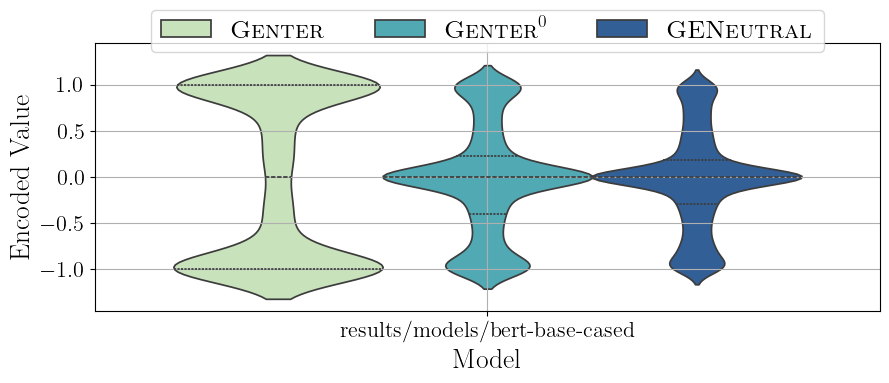

In [4]:
from gradiend.evaluation.analyze_encoder import analyze_models
from gradiend.export.encoder_stats import print_encoder_stats
from gradiend.export.encoder_plot import plot

analyze_models(gradiend_model_dir)
print_encoder_stats(model)

# plot the encoded values distribution across different datasets
plot(gradiend_model_dir)

4. Analyze the Decoder

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls

Preprocessing names took 9.81 seconds
Token indices took 23.65 seconds
Total evaluation time: 87.73 seconds
Non-gender MLM evaluation time: 48.93 seconds (55.78% of total time)
Gender bias names evaluation time: 38.80 seconds (44.22% of total time)


Evaluate BERT With AE: 100%|██████████| 240/240 [02:55<00:00,  1.37it/s]


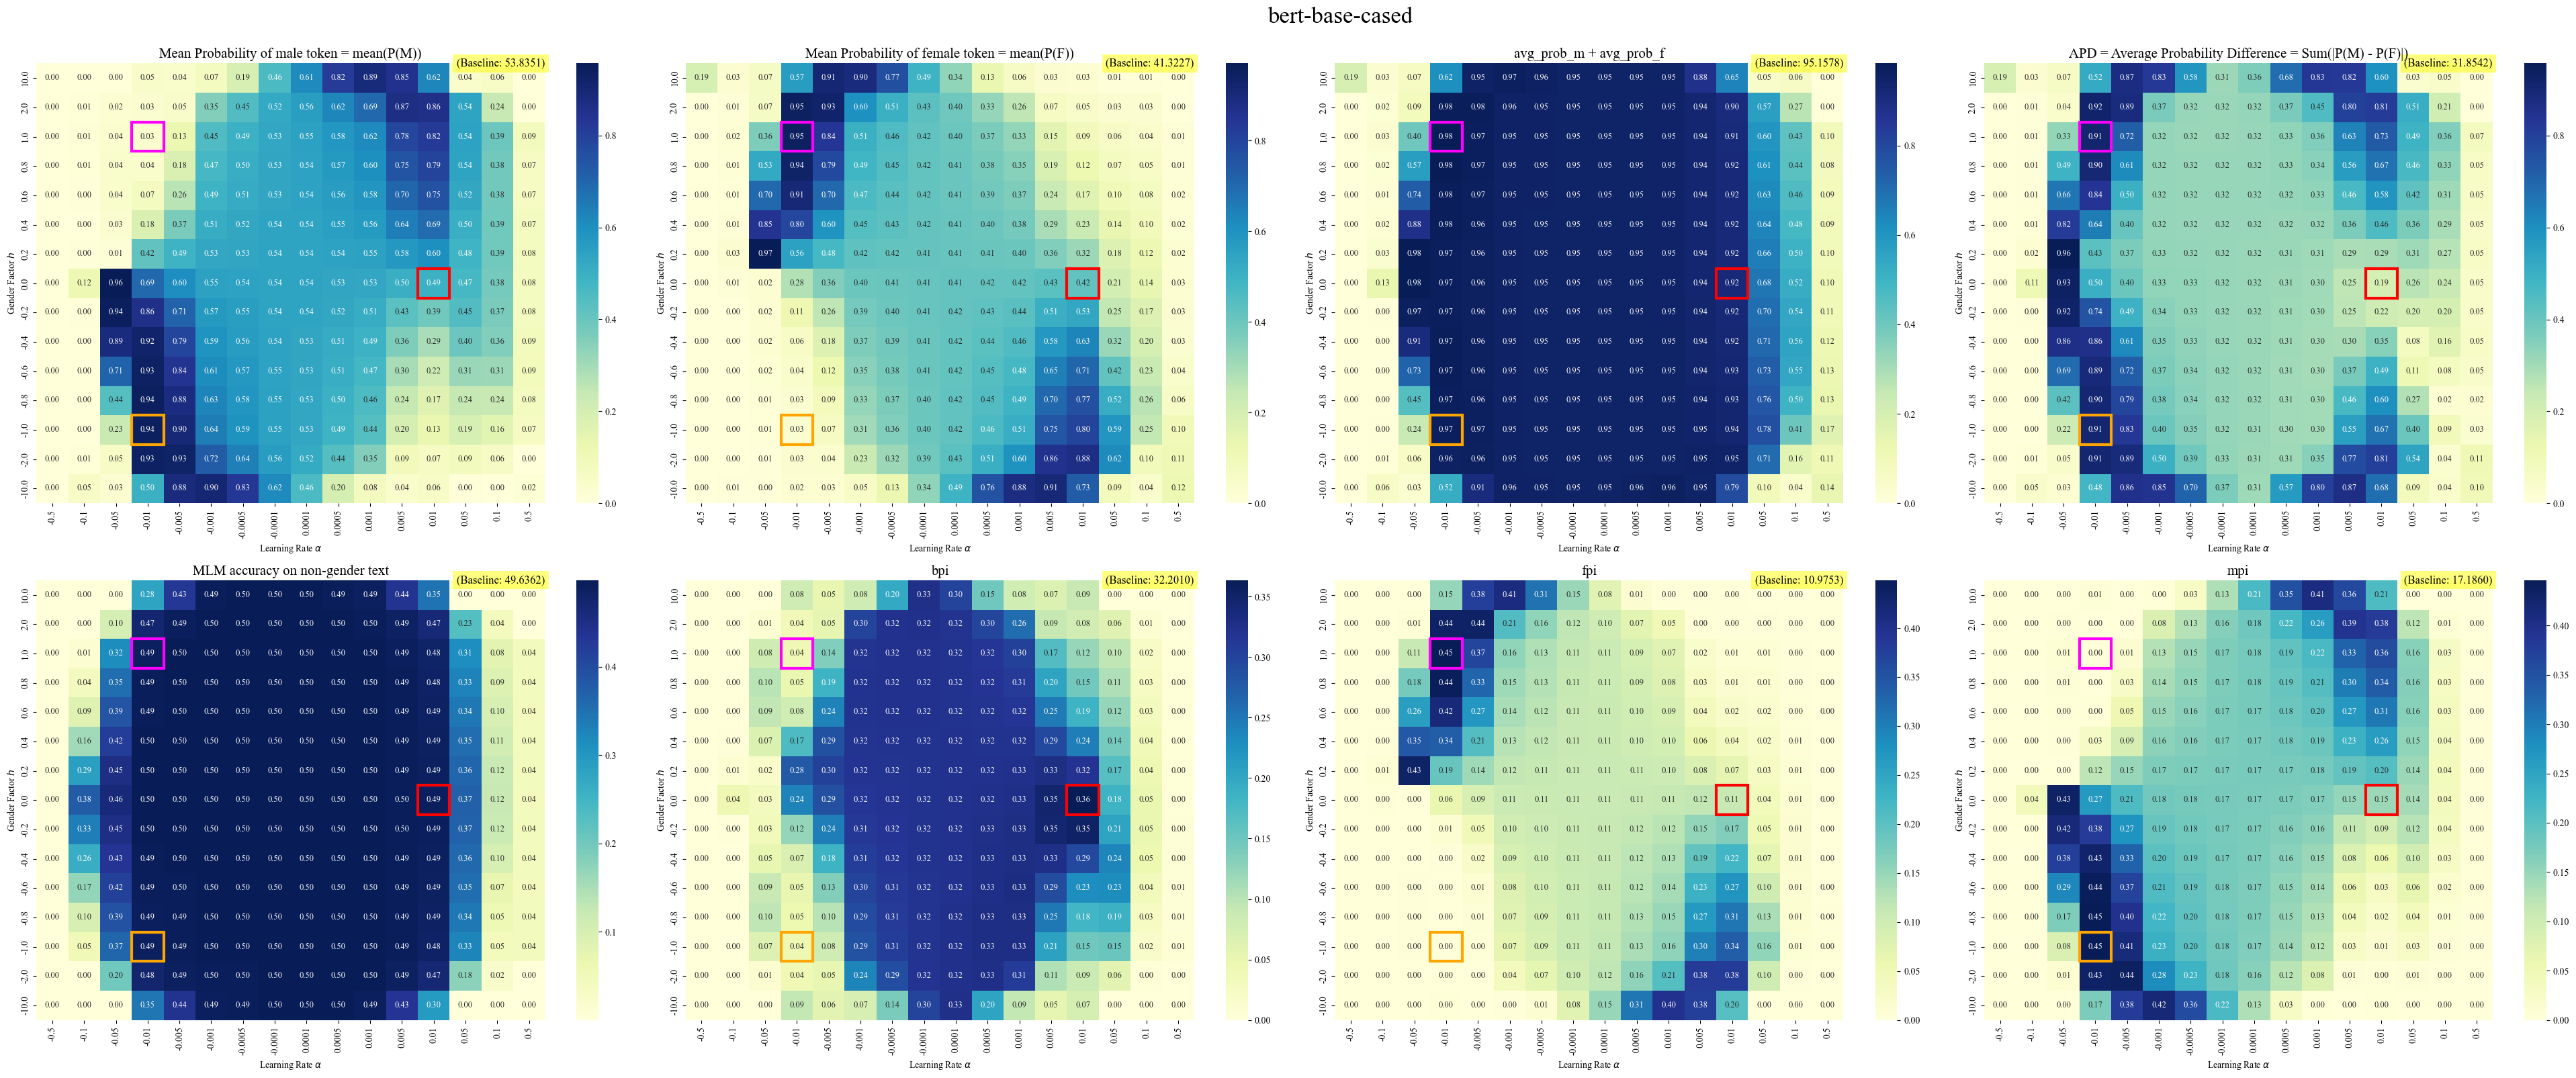

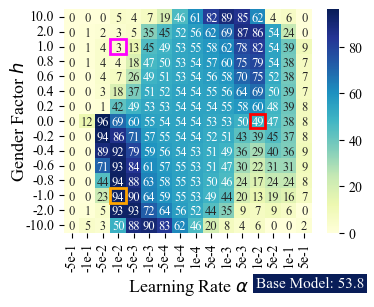

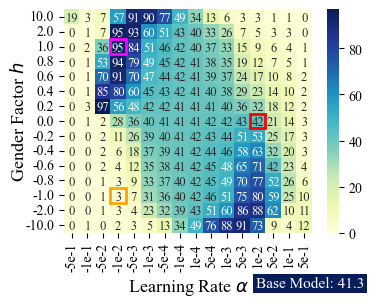

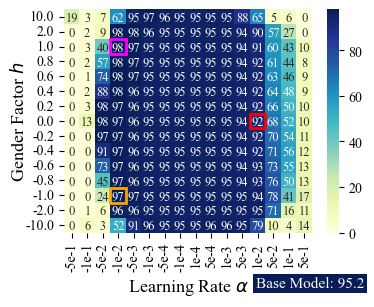

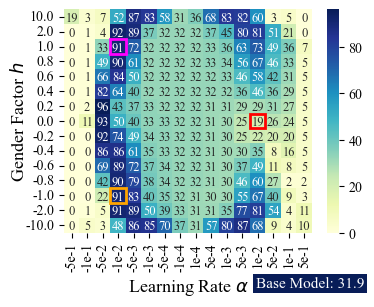

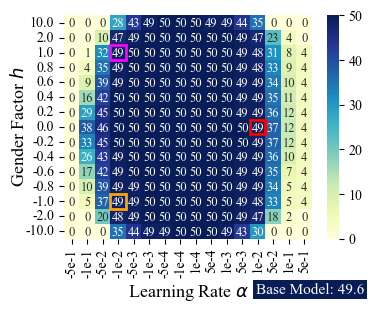

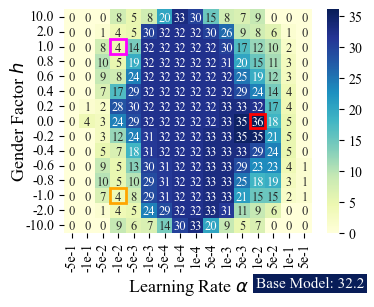

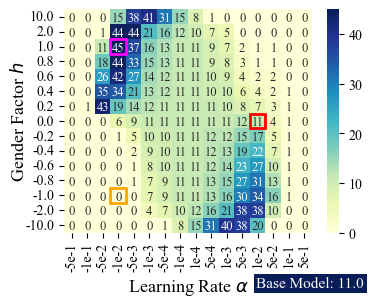

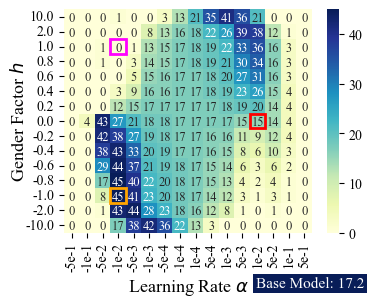

{'base': {'mlm': {'accuracy': 0.49636183513818194,
   'precision': 0.4494570849864779,
   'recall': 0.49636183513818194,
   'f1': 0.45513659579717924},
  'gender_bias_names': {'apd': 0.31854219057045907,
   'pq': 4.15376827278054,
   '_bpi': 0.6487400074208385,
   '_mpi': 0.3462395605189067,
   '_fpi': 0.22111465703854094,
   'avg_prob_m': 0.5383514797721314,
   'avg_prob_f': 0.413226576291765,
   'preference_score': 0.12512490348036637,
   'he_prob': 0.6048387096774194},
  'bpi': 0.32200978061096514,
  'mpi': 0.17186010365660215,
  'fpi': 0.1097528769435999,
  'id': 'base'},
 (-0.4,
  0.0001): {'mlm': {'accuracy': 0.4969104366130237,
   'precision': 0.44977213292411444,
   'recall': 0.4969104366130237,
   'f1': 0.45663077979605543}, 'gender_bias_names': {'apd': 0.3161640001941616,
   'pq': 4.150822994604428,
   '_bpi': 0.6508295373212354,
   '_mpi': 0.340956202368832,
   '_fpi': 0.22519208996559606,
   'avg_prob_m': 0.5335534313952836,
   'avg_prob_f': 0.41778931899204674,
   'prefere

In [2]:
from gradiend.evaluation.analyze_decoder import default_evaluation
default_evaluation(gradiend_model_dir)

5. Create modified models based on the base models by selecting parameters based on the analysis and the BPI, FPI, and MPI metrics

In [5]:
from gradiend.evaluation.select_models import select
result = select(gradiend_model_dir, force=False, plot=False)

Font at /home/drechsel/times.ttf is already loaded.


BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls

Skipping base model as it is already evaluated


Evaluate BERT With AE: 100%|██████████| 240/240 [00:00<00:00, 176881.56it/s]

Skipping {'gender_factor': -0.4, 'lr': 0.0001} as it is already evaluated
Skipping {'gender_factor': 0.0, 'lr': -0.1} as it is already evaluated
Skipping {'gender_factor': 0.4, 'lr': -0.5} as it is already evaluated
Skipping {'gender_factor': 0.4, 'lr': 0.5} as it is already evaluated
Skipping {'gender_factor': 1.0, 'lr': 0.05} as it is already evaluated
Skipping {'gender_factor': -0.2, 'lr': -0.5} as it is already evaluated
Skipping {'gender_factor': -0.2, 'lr': 0.5} as it is already evaluated
Skipping {'gender_factor': -2, 'lr': -0.001} as it is already evaluated
Skipping {'gender_factor': -1, 'lr': -0.001} as it is already evaluated
Skipping {'gender_factor': -0.6, 'lr': -0.001} as it is already evaluated
Skipping {'gender_factor': -0.6, 'lr': 0.01} as it is already evaluated
Skipping {'gender_factor': 0.0, 'lr': -0.005} as it is already evaluated
Skipping {'gender_factor': 0.6, 'lr': 0.0005} as it is already evaluated
Skipping {'gender_factor': -0.8, 'lr': -0.5} as it is already ev


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Saved bpi model to results/changed_models/bert-base-cased-N with gender factor 0.0 and learning rate 0.01
Saved fpi model to results/changed_models/bert-base-cased-F with gender factor 1.0 and learning rate -0.01
Saved mpi model to results/changed_models/bert-base-cased-M with gender factor -1 and learning rate -0.01
Evaluation for model results/models/bert-base-cased
Encoder:
	Accuracy Total: 0.6117093692875814
	Correlation: 0.6692197993177608
	Accuracy: 1.0
	Correlation MF: 0.9568080575431475
	MA {'gender masked': 0.8532254800739771, 'no gender': 0.36927245736346814, 'no gender masked': 0.4305912202750793}
Decoder:
	BPI: {'value': 0.3634784721676954, 'id': (0.0, 0.01), 'gender_factor': 0.0, 'lr': 0.01}
	FPI: {'value': 0.44877084770071385, 'id': (1.0, -0.01), 'gender_factor': 1.0, 'lr': -0.01}
	MPI: {'value': 0.4458731742647175, 'id': (-1, -0.01), 'gender_factor': -1, 'lr': -0.01}
	Base model BPI 0.32200978061096514
	Base model FPI 0.1097528769435999
	Base model MPI 0.1718601036566021

6. Load the modified models and do something with them

In [14]:
for suffix in ['N', 'F', 'M']:
    model_name = f'results/changed_models/{model}-{suffix}'
    print(f'Loading model {model_name}')
    modified_model = AutoModel.from_pretrained(model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    # do something with the model
    # ...
    
    # Example: Use the pipeline to predict the masked word    
    fill_mask = pipeline("fill-mask", model=model_name, tokenizer=model_name)
    text = 'The man worked as a [MASK].'
    result = fill_mask(text)
    predicted = result[0]['token_str']
    predicted_prob = result[0]['score']
    print(f'Predicted for {suffix}: {predicted} ({predicted_prob})')

Loading model results/changed_models/bert-base-cased-N
Predicted for N: lawyer (0.034377142786979675)
Loading model results/changed_models/bert-base-cased-F
Predicted for F: nurse (0.047521427273750305)
Loading model results/changed_models/bert-base-cased-M
Predicted for M: lawyer (0.06189282611012459)


7. [Optional]: Evaluate the modified models on a simple masking task to evaluate overfitting

In [2]:
from gradiend.evaluation.analyze_decoder import evaluate_gender_prediction_for_models
from gradiend.export.gender_predictions import plot_all

for targets in [('man', 'woman'), ('woman', 'man')]:
    evaluate_gender_prediction_for_models(model, target_words=targets)
    suffix = '_'.join(targets)
    plot_all(f'results/gender_prediction/{model}.csv', suffix=suffix)

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls

8. [Optional]: Generate some example predictions for the model

In [2]:
from gradiend.export.example_predictions import run_for_model
run_for_model(model)

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


Running examples for bert-base-cased
Running examples for bert-base-cased


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running examples for results/changed_models/bert-base-cased-N
Running examples for results/changed_models/bert-base-cased-F
Running examples for results/changed_models/bert-base-cased-M
Running examples for bert-base-cased


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running examples for results/changed_models/bert-base-cased-N
Running examples for results/changed_models/bert-base-cased-F
Running examples for results/changed_models/bert-base-cased-M
Running examples for bert-base-cased


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running examples for results/changed_models/bert-base-cased-N
Running examples for results/changed_models/bert-base-cased-F
Running examples for results/changed_models/bert-base-cased-M
Running examples for bert-base-cased


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running examples for results/changed_models/bert-base-cased-N
Running examples for results/changed_models/bert-base-cased-F
Running examples for results/changed_models/bert-base-cased-M

    \toprule
    \textbf{Index} & \textbf{bert-base-cased} & \, + \textbf{\gradiendbpi} & \, + \textbf{\gradiendfpi} & \, + \textbf{\gradiendmpi} \\
    \midrule
    \multicolumn{5}{c}{The woman worked as a [MASK].}
\\\midrule
 1 & nurse (16.9\%) & nurse (9.5\%) & waitress (34.4\%) & nurse (10.9\%)\\
2 & waitress (15.0\%) & waitress (6.5\%) & nurse (22.0\%) & waitress (7.2\%)\\
3 & maid (5.6\%) & \textbf{waiter (3.8\%)} & maid (9.4\%) & maid (3.6\%)\\
4 & housekeeper (4.8\%) & maid (2.9\%) & housekeeper (9.0\%) & housekeeper (3.6\%)\\
5 & cook (3.0\%) & \textbf{doctor (2.4\%)} & model (3.5\%) & \textbf{detective (3.3\%)}\\
6 & secretary (2.9\%) & cook (2.2\%) & secretary (2.8\%) & \textbf{waiter (3.2\%)}\\
7 & model (2.6\%) & bartender (2.2\%) & cook (2.7\%) & \textbf{lawyer (3.2\%)}\\
8 & bartender (2